In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
import torchvision.transforms as T

## nuclei segmentation boundary model

In [3]:
model = torch.load("nucleisegmentationboundarymodel/weights-torchscript.pt")

/home/anupkumar/anaconda3/envs/imaging/lib/python3.9/site-packages/torch/serialization.py:995: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


In [4]:
model.eval()

RecursiveScriptModule(
  original_name=UNet2d
  (encoder): RecursiveScriptModule(
    original_name=Encoder
    (blocks): RecursiveScriptModule(
      original_name=ModuleList
      (0): RecursiveScriptModule(
        original_name=ConvBlock2d
        (block): RecursiveScriptModule(
          original_name=Sequential
          (0): RecursiveScriptModule(original_name=InstanceNorm2d)
          (1): RecursiveScriptModule(original_name=Conv2d)
          (2): RecursiveScriptModule(original_name=ReLU)
          (3): RecursiveScriptModule(original_name=InstanceNorm2d)
          (4): RecursiveScriptModule(original_name=Conv2d)
          (5): RecursiveScriptModule(original_name=ReLU)
        )
      )
      (1): RecursiveScriptModule(
        original_name=ConvBlock2d
        (block): RecursiveScriptModule(
          original_name=Sequential
          (0): RecursiveScriptModule(original_name=InstanceNorm2d)
          (1): RecursiveScriptModule(original_name=Conv2d)
          (2): RecursiveScri

In [5]:
test_data = np.load("nucleisegmentationboundarymodel/test_input_0.npy")

In [6]:
test_data, test_data.shape

(array([[[[37, 20, 15, ..., 14, 15, 14],
          [58, 23, 15, ..., 14, 13, 13],
          [74, 25, 16, ..., 12, 13, 13],
          ...,
          [14, 15, 16, ..., 12, 11, 12],
          [14, 15, 14, ..., 11, 13, 13],
          [15, 14, 15, ..., 12, 13, 13]]]], dtype=uint8),
 (1, 1, 256, 256))

In [7]:
test_data = torch.Tensor(test_data)
test_data

tensor([[[[37., 20., 15.,  ..., 14., 15., 14.],
          [58., 23., 15.,  ..., 14., 13., 13.],
          [74., 25., 16.,  ..., 12., 13., 13.],
          ...,
          [14., 15., 16.,  ..., 12., 11., 12.],
          [14., 15., 14.,  ..., 11., 13., 13.],
          [15., 14., 15.,  ..., 12., 13., 13.]]]])

## Raw test image

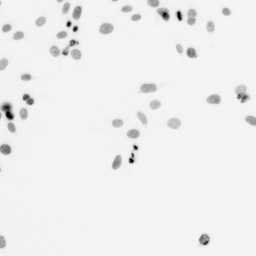

In [8]:
transform = T.ToPILImage()
test_img = transform(torch.squeeze(test_data))
display(test_img)

## Predicted image with segmentations

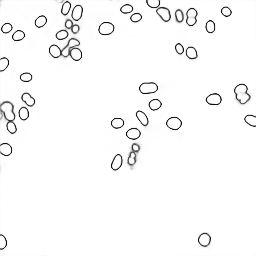

In [9]:
pred = model(test_data)
pred.shape
pred_img = transform(torch.squeeze(pred))
display(pred_img)

## Ground truth segmentations

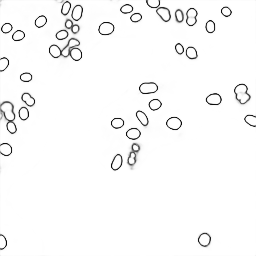

In [10]:
test_sample_data = np.load("nucleisegmentationboundarymodel/test_output_0.npy")

test_sample_img = transform(torch.squeeze(torch.tensor(test_sample_data)))
display(test_sample_img)